In [1]:
% pylab inline
import os
import random
import pandas as pd
from scipy.misc import imread
#import imshow

Populating the interactive namespace from numpy and matplotlib


In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

Age:  MIDDLE


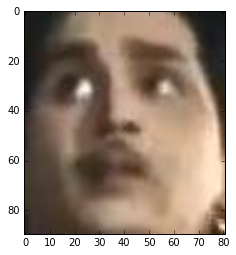

In [3]:
i=random.choice(train.index)
img_name = train.ID[i]
img = imread(os.path.join('Train', img_name))

print "Age: ", train.Class[i]

imshow(img)

In [4]:
from scipy.misc import imresize

temp=[]
for img_name in train.ID:
    img_path=os.path.join('Train',img_name)
    img=imread(img_path)
    img=imresize(img,(32,32))
    img=img.astype('float32')
    temp.append(img)

import numpy as np

train_x=np.stack(temp)

In [5]:
train_x/=255

In [6]:
train_x=train_x.astype('float32')

In [7]:
train.Class.value_counts(normalize=True)

MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64

In [8]:
train_labels=train.Class

In [9]:
train_labels=train_labels.reshape(19906,1)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [10]:
from sklearn.preprocessing import LabelEncoder
import keras
lb = LabelEncoder()
train_labels = lb.fit_transform(train.Class)
train_labels = keras.utils.np_utils.to_categorical(train_labels)

Using TensorFlow backend.


In [11]:
from keras.models import Sequential
from keras.layers import *

In [12]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3,activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [29]:
from keras.preprocessing.image import ImageDataGenerator 
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
vertical_flip=False) # randomly flip images

In [30]:
 model.load_weights('3rd_iter.h5')

In [31]:
train_x.shape

(19906, 32, 32, 3)

In [32]:
gen_flow=datagen.flow(train_x,train_labels,batch_size=128,seed=0)
    

In [33]:
# Fit the model on the batches generated by datagen.flow().
model.fit_generator(gen_flow,steps_per_epoch=len(train_x) / 128, epochs=20)

Epoch 1/20
155/155 [==============================] - 51s - loss: 0.4593 - acc: 0.8146    
Epoch 2/20
155/155 [==============================] - 50s - loss: 0.4501 - acc: 0.8187    
Epoch 3/20
155/155 [==============================] - 50s - loss: 0.4532 - acc: 0.8177    
Epoch 4/20
155/155 [==============================] - 51s - loss: 0.4472 - acc: 0.8169    
Epoch 5/20
155/155 [==============================] - 51s - loss: 0.4428 - acc: 0.8179    
Epoch 6/20
155/155 [==============================] - 51s - loss: 0.4441 - acc: 0.8198    
Epoch 7/20
155/155 [==============================] - 53s - loss: 0.4296 - acc: 0.8262    
Epoch 8/20
155/155 [==============================] - 53s - loss: 0.4372 - acc: 0.8186    
Epoch 9/20
155/155 [==============================] - 53s - loss: 0.4303 - acc: 0.8251    
Epoch 10/20
155/155 [==============================] - 53s - loss: 0.4264 - acc: 0.8261    
Epoch 11/20
155/155 [==============================] - 53s - loss: 0.4241 - acc: 0.8295  

In [34]:
model.save_weights('4th_iter.h5')

In [35]:
from scipy.misc import imresize

ghj=[]
for img_name in test.ID:
    img_path=os.path.join('Test',img_name)
    img=imread(img_path)
    img=imresize(img,(32,32))
    img=img.astype('float32')
    ghj.append(img)

import numpy as np

test_x=np.stack(ghj)

In [36]:
test_x/=255

In [37]:
pred = model.predict_classes(test_x)
print np.unique(pred)
pred = lb.inverse_transform(pred)
print pred[5]

6592/6636 [============================>.] - ETA: 0s[0 1 2]
MIDDLE


In [39]:
test['Class'] = pred
test.to_csv("sub04.csv", index=False)